# Support Vector Regressors (SVR)

## Introduction

**Problem Statement:** We want to predict the stock price of Coca-Cola using time series data. Predicting future stock prices is a crucial task for investors and financial analysts aiming to make informed investment decisions. By leveraging datapoints such as historical stock prices, Consumer Spending, GDP growth, Inflation rate, Interest rates and unemployment rate, we aim to develop a predictive model that can forecast the future stock prices of Coca-Cola.

**ML Model:**Support Vector Regression (SVR) is chosen for this task due to its ability to handle high-dimensional data and capture nonlinear relationships between the input features (economic time series variables) and the target variable (stock price). A few reason why SVR 'might' be a good choice are

1. Handling Nonlinear Relationships: SVR is capable of capturing nonlinear relationships between the input features and the target variable (stock price). Economic indicators often exhibit complex and nonlinear patterns.
2. Robustness to Outliers: Financial data can be noisy, containing outliers and irregular patterns. SVR is less sensitive to outliers compared to traditional regression techniques.
3. Flexibility in Kernel Functions: SVR allows for the use of different kernel functions (such as linear, polynomial, radial basis function) to capture various types of relationships between the input features and the target variable. This flexibility enables SVR to adapt to the specific characteristics of the data and potentially improve prediction accuracy.
4. Effective in High-Dimensional Spaces: Time series data often involve multiple variables. SVR is effective in high-dimensional spaces, making it suitable for modeling complex relationships between multiple input features and the target variable.
5. Generalization Performance: SVR aims to minimize structural risk rather than empirical risk, which helps in achieving better generalization performance on unseen data. This is crucial for making accurate predictions of future stock prices, as the model needs to generalize well to new data points.

**Dataset Description:**We do not have a readymade CSV file for this data. We will source the data from Yahoo Finance and FRED (Federal Reserve Bank of St. Louis). There are multiple steps involved in collecting the data which I will detail as we perform them instead of detailing them here. The choice of features to use as predictors is due to a high level understanding of what economic factors mostly influence the market (and hence the stock prices). These are speculative, and any other combination of factors can be used.

Step 1: Collecting Stock Price data from Yahoo Finance. We Start collecting the data from the start of 2013 upto the present day in intervals of 3 months (or in other words, quaterly data). By executing the following code, we get the Open, High, Low and Closing values of the stock, we get the volume traded, dividends and stock split data as well.

In [2]:
import yfinance as yf
from datetime import datetime

# Define the stock symbol (KO for Coca-Cola)
symbol = "KO"

# Create a Ticker object for Coca-Cola
ko = yf.Ticker(symbol)

# Define custom start date and end date

start_date = '2012-12-31'
end_date = datetime.today()

# Get daily data for the specified date range
data = ko.history(start=start_date, end=end_date, interval="3mo")

# Resample to quarterly frequency (end of quarter)
quarterly_data = data.resample('Q').last()

# Reset the index to make the 'Date' column a regular column
quarterly_data = quarterly_data.reset_index()

In [3]:
# Print the DataFrame with the 'Date' column
quarterly_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-12-31 00:00:00-05:00,25.769885,27.211995,25.442448,26.975126,627696600,0.00,0.0
1,2013-03-31 00:00:00-04:00,26.814881,30.256437,26.787014,27.859888,894424000,0.28,0.0
2,2013-06-30 00:00:00-04:00,28.033505,29.282556,26.524817,26.791470,863530400,0.28,0.0
3,2013-09-30 00:00:00-04:00,27.040236,28.884371,26.022784,28.396839,947889200,0.56,0.0
4,2013-12-31 00:00:00-05:00,28.739229,29.663759,26.438658,27.377522,975777300,0.00,0.0


In [4]:
# Let us export the data to a csv file as we will be merging this with other data as well
#quarterly_data.to_csv('coca_cola_time_series_data.csv')

Step 2: Next, we want to fetch data for Consumer Spending, GDP Growth, Inflation Rate, Interest Rate and Unemployment Rate from the FRED API. We will then store it in the combined_data DataFrame. We try to achieve this using the next few lines of code.

In [9]:
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd

# Define series codes and corresponding names
economic_data = [
    {'code': 'PCE', 'name': 'Consumer Spending'},
    {'code': 'GDPC1', 'name': 'GDP Growth'},
    {'code': 'CPIAUCNS', 'name': 'Inflation Rate'},
    {'code': 'GS10', 'name': 'Interest Rates'},
    {'code': 'UNRATE', 'name': 'Unemployment Rate'}
]

# Define the start and end dates for a span of 10 years
start_date = '2012-09-30'
end_date = '2023-09-01'

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Loop through the economic data list
for item in economic_data:
    # Retrieve data from FRED API
    data = pdr.get_data_fred(item['code'], start_date, end_date)

    # Resample data to quarterly frequency (taking the last value of each quarter)
    data = data.resample('Q').last()

    # Rename columns to include the economic indicator name
    data = data.rename(columns={'value': item['name']})

    # Merge data with existing combined_data DataFrame
    combined_data = pd.concat([combined_data, data], axis=1)

# Add the date column to the data
combined_data['Date'] = combined_data.index

combined_data.reset_index

<bound method DataFrame.reset_index of                 PCE      GDPC1  CPIAUCNS  GS10  UNRATE       Date
DATE                                                             
2012-12-31  11181.2  17489.852   229.601  1.72     7.9 2012-12-31
2013-03-31  11290.1  17662.400   232.773  1.96     7.5 2013-03-31
2013-06-30  11344.4  17709.671   233.504  2.30     7.5 2013-06-30
2013-09-30  11445.9  17860.450   234.149  2.81     7.2 2013-09-30
2013-12-31  11593.2  18016.147   233.049  2.90     6.7 2013-12-31
2014-03-31  11722.3  17953.974   236.293  2.72     6.7 2014-03-31
2014-06-30  11861.7  18185.911   238.343  2.60     6.1 2014-06-30
2014-09-30  11991.4  18406.941   238.031  2.53     5.9 2014-09-30
2014-12-31  12096.1  18500.031   234.812  2.21     5.6 2014-12-31
2015-03-31  12176.1  18666.621   236.119  2.04     5.4 2015-03-31
2015-06-30  12307.9  18782.243   238.638  2.36     5.3 2015-06-30
2015-09-30  12386.4  18857.418   237.945  2.17     5.0 2015-09-30
2015-12-31  12452.0  18892.206   236.

In [10]:
#visualising our combines_dataframe
combined_data.head()

,PCE,GDPC1,CPIAUCNS,GS10,UNRATE,Date
DATE,,,,,,
2012-12-31,11181.2,17489.852,229.601,1.72,7.9,2012-12-31
2013-03-31,11290.1,17662.400,232.773,1.96,7.5,2013-03-31
2013-06-30,11344.4,17709.671,233.504,2.30,7.5,2013-06-30
2013-09-30,11445.9,17860.450,234.149,2.81,7.2,2013-09-30
2013-12-31,11593.2,18016.147,233.049,2.90,6.7,2013-12-31


In [11]:
# Let us export the data to a csv file as we will be merging this with other data as well
#combined_data.to_csv('economic_data_with_single_date_column_quarterly.csv', index=False)

Step 3: Let us do some data formatting to be able to merge the datasets. We will do this for both - quaterly_data and combined_data. We will be formatting only the date column into a proper format. All the other data is okay.

In [12]:
#Format the dates in the "Date" column of the quarterly_data DataFrame to a string format in the "mm-dd-yyyy" style
quarterly_data['Date'] = quarterly_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

#Visualise the Date column
quarterly_data["Date"].head()

0    12-31-2012
1    03-31-2013
2    06-30-2013
3    09-30-2013
4    12-31-2013
Name: Date, dtype: object

In [13]:
#Format the dates in the "Date" column of the quarterly_data DataFrame to a string format in the "mm-dd-yyyy" style
combined_data['Date'] = combined_data['Date'].apply(lambda x: x.strftime("%m-%d-%Y"))

#Visualise the Date column
combined_data["Date"].head()

DATE
2012-12-31    12-31-2012
2013-03-31    03-31-2013
2013-06-30    06-30-2013
2013-09-30    09-30-2013
2013-12-31    12-31-2013
Freq: Q-DEC, Name: Date, dtype: object

Step 4: Now that we have formatted our data in the final format, let us merge both of these files into one single file. We will merge them on the basis of the date column using an inner join.

In [14]:
#define a dataframe to store the merged files
merged_df = pd.merge(quarterly_data, combined_data, on="Date", how="inner")

# Print the merged DataFrame
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,25.769885,27.211995,25.442448,26.975126,627696600,0.00,0.0,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,26.814881,30.256437,26.787014,27.859888,894424000,0.28,0.0,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,28.033505,29.282556,26.524817,26.791470,863530400,0.28,0.0,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,27.040236,28.884371,26.022784,28.396839,947889200,0.56,0.0,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,28.739229,29.663759,26.438658,27.377522,975777300,0.00,0.0,11593.2,18016.147,233.049,2.90,6.7


In [15]:
#We want to remove the columns which we do not want to use. Let us drop these
merged_df = merged_df.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])

#Visualize the final dataframe
merged_df.head()

,Date,Close,PCE,GDPC1,CPIAUCNS,GS10,UNRATE
0,12-31-2012,26.975126,11181.2,17489.852,229.601,1.72,7.9
1,03-31-2013,27.859888,11290.1,17662.400,232.773,1.96,7.5
2,06-30-2013,26.791470,11344.4,17709.671,233.504,2.30,7.5
3,09-30-2013,28.396839,11445.9,17860.450,234.149,2.81,7.2
4,12-31-2013,27.377522,11593.2,18016.147,233.049,2.90,6.7


We are finally done processing our dataset. Now, we have data at the end of every quarter starting from Sep 2012 to Sep 2023. Let us do a quick recap.
1. We pulled stock prices data and filtered out everything except Closing prices from yahoofinance.
2. We pulled other economic indicators from the FRED API.
3. We merged both of these datasets based on the date.

What we want to be able to find a realtion between other factors and the 'Closing' price of the stock at the end of a particular quarter given the other parameter. Hence, the 'Closing Price' becomes our dependent or target variable and all the other variables become our independent variables (or features).

## Implementation

Let us move on to the implementation phase.

Let us define our feature space and labes.
As mentioned earlier, we are trying to predict stock price hence the 'closing price' column will be our prediction. Everyting else will be part of the 'features'.

In [16]:
#import all necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame containing the data
X = merged_df[['PCE', 'GDPC1', 'CPIAUCNS', 'GS10', 'UNRATE']]  # Independent variables
y = merged_df['Close']  # Dependent variable

Scaling the Data: Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature 'dominates' the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

Scaling your data in machine learning is important because many algorithms use the L-2 norm between two data points in their computations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other irrespective of the importance of that variable in being a predictor. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

Source: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

The following code uses the StandardScaler object from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. As mentioned above, Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms. Keep in mind, we need to scale features on both - the training AND testing sets.

In [17]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

While training a Machine Learning model, we split our 'Supervised' Dataset into a Training Dataset and a Testing Dataset. We use the training dataset to 'train' our model and the testing dataset to verify how accurate our trained model is at predicting on unknown data (The training data is unknown to the model as we have not used it to train the paramaters).

  1. X_train: This will be the training set of features (size = 80% of training set).
  2. X_test: This will be the testing set of features (size = 20% of testing set).
  3. y_train: This will be the corresponding training set of target values (size = 80% of training set).
  4. y_test: This will be the corresponding testing set of target values (size = 20% of testing set).

We can use the train_test_split function which randomly splits the data into training and testing sets. By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test), as specified by the test_size=0.2 argument. It is a standard practise to use an 80-20 split. The motivation behind this is loosely the Pareto principle.The Pareto principle is not a mathematically guaranteed property, but many observed phenomena follow the Pareto principle. As it is seen ubiquitous in nature, we try to emulate the same conjecture with our model. After all, we are trying to emulate 'intelligence'.

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we have the scaled and separated data which we can use to train our model. We will do this using the the SVC fucntion which is pre-defined in Python. The usual process is:
1. Define the ML model.
2. Fit the model to our training set.
3. Predict values of our testing set using this model.
4. Calculate accuracy.
5. If not happy with the results, repeat the process above with different paramaters.

While implemeting SVR, we have to decide what parameters to give to the function. The most important being the kernel type, the regularization parameter and the epsilon-tube width. The final parameters are chosen after trying various values for the parameters and choosing the best set. In practise, it is common to initialise generic values.
1. Kernel: Specifies the kernel type to be used in the algorithm.
2. Regularization parameter: The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
3. Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value. Must be non-negative.

In [19]:
# Initialize SVR model
svr_model = SVR(kernel='rbf', C=3.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict 'Close' values
y_pred = svr_model.predict(X_test)

## Analysis

Let us write a small code that will generate a scatter plot comparing the actual 'Close' prices (y_test) with the predicted 'Close' prices (y_pred).

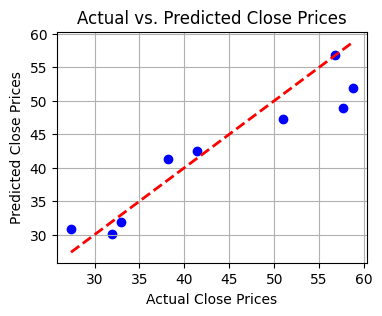

In [20]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains actual 'Close' prices and 'y_pred' contains predicted 'Close' prices
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()

Now that we have fit our model to the data, we need some metrics to verify how well the model has performed. A few of the most common metrics for verification are:
1. Mean Absolute Error: MAE measures the average absolute difference between the actual and predicted values. It is less sensitive to outliers compared to MSE and RMSE. A lower MAE indicates better performance.
2. Root Mean Square Error: RMSE is the root of the Mean Squared Error(MSE). MSE measures the average squared difference between the actual and predicted values. A lower RMSE (and MSE) indicates better performance.
3. Mean Absolute Percentage Error: MAPE calculates the average percentage difference between the actual and predicted values. It provides a measure of the relative error and is useful for comparing the performance of the model across different datasets.

In [21]:
#Defining a fucntion to calculate MAPE as there is no in-built fucntion
def mean_absolute_percentage_error(y_true, y_pred):
    # Convert input arrays to numpy arrays to ensure compatibility with mathematical operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate absolute percentage error for each data point
    abs_percentage_error = np.abs((y_true - y_pred) / y_true)

    # Calculate the mean of absolute percentage errors
    mape = np.mean(abs_percentage_error) * 100

    return mape

In [24]:
import numpy as np

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Error (MAE): 3.3116367337657833
Root Mean Squared Error (RMSE): 4.290001556333118
Mean Absolute Percentage Error (MAPE): 7.35%


By analysing these metrics, investors can make a decision about the accuracy of their models to decide how much risk to bear. They can make use of strategies like shorting, stoploss etc to account for additional risk. Analysing the above metrics.
1. MAE: On an average, we are 3.3 off from the original price. For a share price of 10, 3.3 is alot (approx 33%). But for a share price of 100, 3.3 is not too muhc (3.3%). Hence, it is more useful to use the MAPE metric.
2. MAPE: On an average, we are 7.35% off the actual value. This metric gives us a good 'error' rate of the model. If my model tells me that the share price will be 100, I can fairly assume it be in the range of 92.5 to 107.5.
3. RMSE: RMSE penalizes large errors more heavily compared to Mean Absolute Error (MAE). In the context of stock price prediction, large errors can have significant financial implications for investors. Thus, we want our RMSE to be as close as possible to the MAE. By using this metric along with the MAE, we can get an idea of how many 'large errors' our model has.

In a real world setting, all of these errors are too big. Even the smallest 0.1% of errors make a huge difference. But owing to the limited data and compute power we have at our disposal, this gives a good idea about how a model works and how we can predict the accuracy of the model.

Let us also try to get a basic idea of the pros and cons associated with SVRs.

**Pros:**
1. Handles Non-Linearity: SVR is capable of modeling complex, non-linear relationships between the independent and dependent variables.
2. Effective in High-Dimensional Spaces: SVR can be effective even when the number of features is greater than the number of samples, making it suitable for high-dimensional data.
3. Robust to Outliers: SVR is less sensitive to outliers in the data compared to some other regression techniques.
4. Flexibility in Kernels: SVR allows the use of different kernel functions (e.g., linear, polynomial, radial basis function) to better capture underlying patterns in the data.

**Cons:**
1. Computationally Intensive: Training an SVR model can be computationally expensive, especially with large datasets. It may require more time and resources compared to simpler models.
2. Sensitive to Kernel Choice: The choice of kernel and associated hyperparameters can significantly impact model performance. It may require experimentation and tuning.
3. Limited Scalability: SVR may not be the best choice for very large datasets due to its computational demands.
4. Potential Overfitting: Without proper hyperparameter tuning, SVR can be prone to overfitting, especially if the kernel is too complex.
5. Requires Feature Scaling: SVR is sensitive to the scale of features. It's important to standardize or normalize the features before fitting the model.